# 0. Install and import the libraries

In [1]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install matplotlib

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached werkzeug-3.0.4-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 7.5 MB/s eta 0:00:00MB/s eta 0:00:01:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.6 MB/s eta 0:00:007.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 7.3 MB/s eta 0:00:007.3 MB/s eta 0:00:01
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.9 MB/s eta 0:00:006.3 MB/s eta 0:00:01
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Using cached werkzeug-3.0.4-py3-none-any.whl (227 kB)
  Attempting uninstall: numpy

In [2]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# 1. Set Random Seed for Reproducibility

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
batch_size = 64

# 2. Load and Preprocess the MNIST Dataset

In [4]:
# Load the MNIST dataset
(x_train, y_train_orig), (x_test, y_test_orig) = keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range and flatten them
x_train = x_train.astype('float32') / 255.0
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test = x_test.astype('float32') / 255.0
x_test_flat = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train_orig, num_classes)

y_test = keras.utils.to_categorical(y_test_orig, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 3. Hyperparameters

In [19]:
''' TODO: Adjust the following parameters with different values. Save the plots and test results for each setup.
    TODO: write a report about your findings from varying the parameters and their effect on overall performance. '''

# lr: 0.1, 0.01, ...
# epoch: 5, 10, 50, ...
# layer: [128], [256, 256], ... .
learning_rate = 0.01
num_epochs = 5
hidden_layers = (128,)

# 4. Define the Neural Network Model

In [20]:
def create_mlp_model(input_size, hidden_layers, output_size):
    model = keras.Sequential()

    # Input layer is defined by specifying input_shape in the first layer
    for i, units in enumerate(hidden_layers):
        print("This is the unit ", units)
        if i == 0:
            # First hidden layer with input shape specified
            model.add(layers.Dense(units, activation='relu', input_shape=(input_size,)))
        else:
            # Subsequent hidden layers
            model.add(layers.Dense(units, activation='relu'))

    # Output layer with softmax activation for multi-class classification
    model.add(layers.Dense(output_size, activation='softmax'))

    return model

# Model parameters
input_size = 28 * 28  # MNIST images are 28x28 pixels
output_size = num_classes  # 10 classes for digits 0-9

# Create the model
model = create_mlp_model(input_size, hidden_layers, output_size)

This is the unit  128


# 5. Compile the Model

In [21]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train the Model

In [22]:
history = model.fit(
    x_train_flat, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.1,  # Use 10% of training data for validation
    verbose=1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6285 - loss: 1.3683 - val_accuracy: 0.8975 - val_loss: 0.4325
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8731 - loss: 0.4723 - val_accuracy: 0.9138 - val_loss: 0.3265
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8925 - loss: 0.3851 - val_accuracy: 0.9208 - val_loss: 0.2879
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9020 - loss: 0.3456 - val_accuracy: 0.9268 - val_loss: 0.2653
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9086 - loss: 0.3200 - val_accuracy: 0.9307 - val_loss: 0.2488


# 7. Evaluate the Model on Test Data

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 91.98%


# 8. Visualize Training History

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

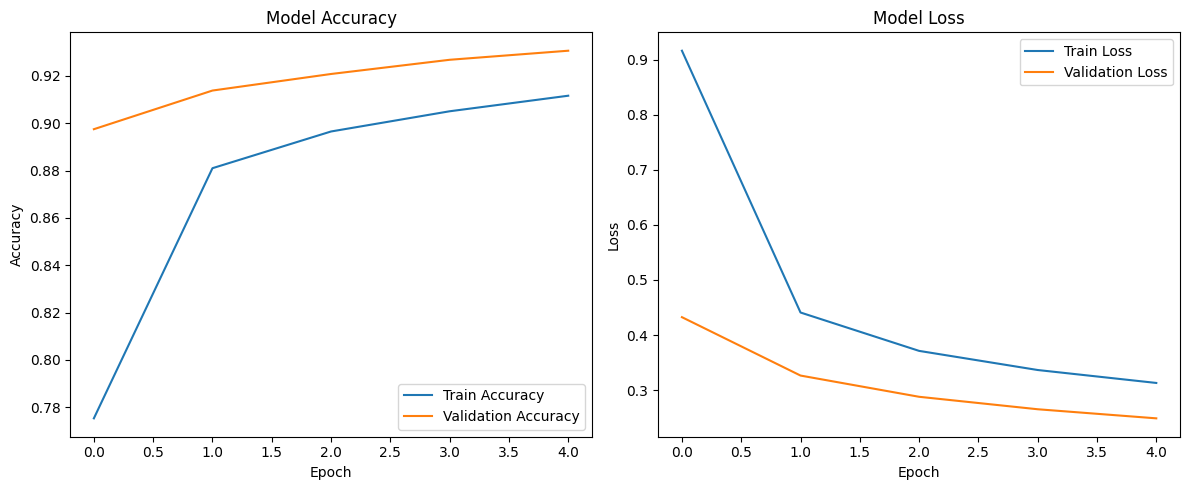

In [24]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig()

# 9. Test the Model on Random Input Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


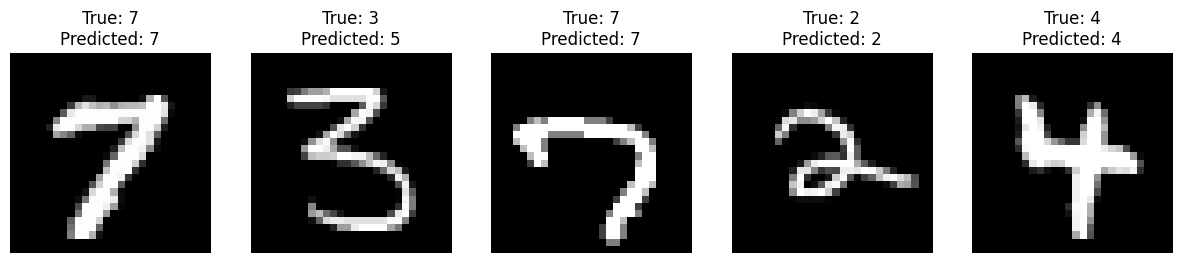

(array([7, 5, 7, 2, 4]),
 array([[1.00960324e-06, 1.55742225e-06, 1.24617654e-04, 1.10515844e-04,
         1.93396681e-06, 1.38183213e-05, 8.42664605e-08, 9.97420669e-01,
         3.63279250e-04, 1.96253438e-03],
        [9.71299876e-03, 2.92169803e-04, 9.70418472e-03, 2.15988621e-01,
         1.88642950e-03, 6.84287012e-01, 2.75216968e-04, 3.30918469e-04,
         7.27205724e-02, 4.80188569e-03],
        [1.45993344e-02, 1.46707729e-03, 5.63952723e-04, 4.34385799e-03,
         3.77248530e-03, 9.61470976e-03, 4.27495310e-04, 8.94432843e-01,
         1.10640684e-02, 5.97142875e-02],
        [4.14318405e-04, 4.79314961e-02, 5.58979034e-01, 2.59956322e-03,
         1.27739146e-01, 8.78854189e-03, 6.86316490e-02, 1.01387709e-01,
         5.63785471e-02, 2.71499865e-02],
        [3.73089826e-08, 4.29923858e-07, 9.37273441e-08, 1.64230314e-05,
         9.98430312e-01, 2.24928808e-05, 3.17202866e-05, 3.02755769e-04,
         1.60988238e-05, 1.17963052e-03]], dtype=float32))

In [25]:
# Select random samples from the test set
num_samples = 5
random_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
random_images = x_test[random_indices]
random_images_flat = x_test_flat[random_indices]
random_labels = y_test_orig[random_indices]

# Predict the labels of the random images
predictions = model.predict(random_images_flat)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the random images along with predicted and true labels
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {random_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()
predicted_labels, predictions

In [ ]:

def gen_accuracy_and_loss_graph(model, plot_title): 
    """
    @param plot_title: the title to save the generated graphs under
    @param model: a model trained on the MINST digits dataset
    @return: generates graphs of the model's loss and accuracy over multiple 
    epochs
    """
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(model.history['accuracy'], label='Train Accuracy')
    plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(model.history['loss'], label='Train Loss')
    plt.plot(model.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.savefig(plot_title)
    

def accuracy_and_loss_graphs_of_model(model_config, training_data):
    """
    @param model_config: a tuple containing the learning rate, number of 
    epochs, number of hidden layers for the model, and other configuration 
    information for the model
    @param training_data: a tuple of the samples and expected labels for each sample 
    to be used for training the model
    @return: creates a model using the given configuration and training 
    data and generates two graphs of the model's accuracy and loss
    over multiple epochs
    """
    samples, labels = training_data
    model = (create_mlp_model(model_config["input_size"],
                             model_config["hidden_layers"],
                              model_config["output_size"])
             .compile(optimizer=keras.optimizers.SGD(learning_rate=model_config['learning_rate']),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
             .fit(samples,
                  labels, 
                  epochs=model_config["epochs"],
                  batch_size=model_config["batch_size"],
                  validation_split=0.1))
    
    gen_accuracy_and_loss_graph(model, f"lr_{model_config['learning_rate']}|epoch_{model_config['epoch']}|layer_{model_config["layer"]}")

